<a href="https://colab.research.google.com/github/lowvey/CCMACLRL_EXERCISES_COM232/blob/Exercise1/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [200]:
# put your answer here
df= pd.read_csv('DF.csv')
df.head()

,Name,Post/Shares Frequently,Active,Replies to message/comments,Numbers of Friends/Followers,Personality
0,Red,1,1,1,"3,747",1
1,Kurt,1,1,1,708,1
2,Jabez,1,1,1,586,1
3,Dreig,1,1,1,"1,170",1
4,Ronen,1,1,1,"1,097",1


In [201]:
df.drop(columns='Name', inplace=True)

Display the summary of all the features of the dataset using `.info()`

In [202]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Post/Shares Frequently        99 non-null     int64 
 1   Active                        99 non-null     int64 
 2   Replies to message/comments   99 non-null     int64 
 3   Numbers of Friends/Followers  99 non-null     object
 4   Personality                   99 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


Display the total number of samples from each label using `.value_counts()`

In [203]:
# put your answer here
df['Personality'].value_counts()

,count
Personality,
1,85
0,14


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

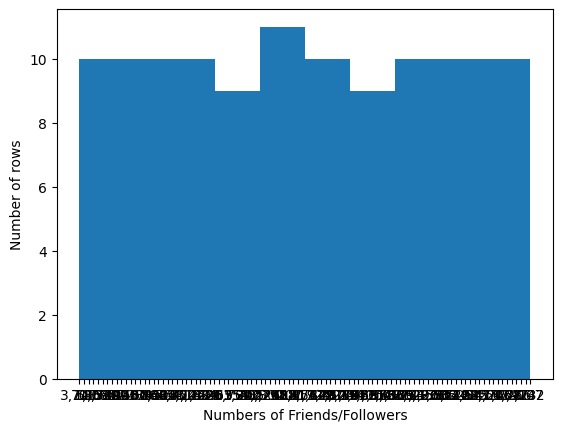

In [204]:
# put your answer here
plt.hist(df["Numbers of Friends/Followers"])
plt.xlabel("Numbers of Friends/Followers")
plt.ylabel("Number of rows")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [205]:
# put your answer here
df.drop(columns=['Personality']).values

array([[1, 1, 1, '3,747'],
       [1, 1, 1, '708'],
       [1, 1, 1, '586'],
       [1, 1, 1, '1,170'],
       [1, 1, 1, '1,097'],
       [1, 1, 1, '3,549'],
       [1, 1, 1, '380'],
       [0, 1, 0, '657'],
       [1, 1, 1, '399'],
       [1, 1, 1, '1000'],
       [1, 1, 1, '425'],
       [1, 1, 1, '1400'],
       [1, 1, 1, '587'],
       [1, 1, 0, '388'],
       [1, 1, 1, '606'],
       [1, 1, 1, '745'],
       [1, 1, 1, '860'],
       [1, 1, 1, '1,007'],
       [1, 1, 1, '484'],
       [1, 1, 1, '567'],
       [1, 1, 1, '358'],
       [1, 1, 1, '4,700'],
       [1, 1, 1, '852'],
       [1, 1, 1, '1,742'],
       [1, 1, 1, '4,147'],
       [1, 1, 1, '1,750'],
       [1, 1, 1, '1,898'],
       [1, 1, 1, '534'],
       [1, 1, 1, '426'],
       [0, 0, 0, '21'],
       [1, 1, 1, '203'],
       [1, 1, 1, '67'],
       [1, 1, 1, '655'],
       [1, 1, 1, '1,700'],
       [1, 1, 1, '355'],
       [1, 1, 1, '1,300'],
       [1, 1, 1, '25'],
       [1, 1, 1, '405'],
       [1, 1, 1, '427'],
  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [206]:
# put your answer here
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [207]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Display the dimensions of each variables using `.shape()`

In [208]:
# put your answer here
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 4)
(20, 4)
(79,)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [209]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [210]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [211]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

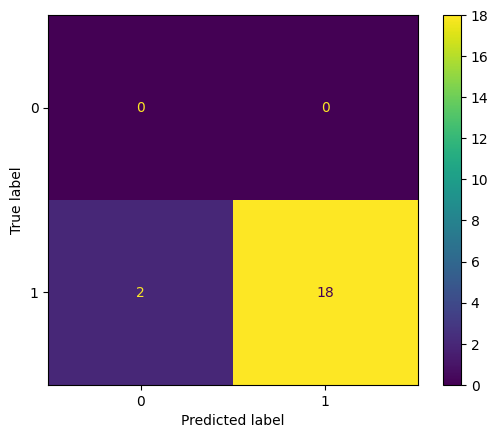

In [212]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

disp.plot()


Display the accuracy

In [213]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.9

Display the precision

In [214]:
# put your answer
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.  0.9]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Display the recall

In [215]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0. 1.]


Display the f1-score

In [216]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.         0.94736842]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [217]:
# put your answer here